## COG403: Problem 1 of Problem Set 2: Semantic Representations

### All 3 problems for Problem Set 2 Due 1 November 2018, 2:00pm

In this problem, we will look at three different approaches for generating word vectors. We will then evaluate these word vectors on their ability to match human similarity judgments on a set of noun-noun pairs.  Specifically, we will use a subset of SimLex-999$^1$ that contains animal nouns and has average similarity judgments on pairs of these obtained from human participants.  

### (a)

Write a function `generate_WN_vectors()` to generate feature vectors based on Word Net features$^2$. Generate these vectors and then save them in `data/word_net.vec` using the `write_vectors` function in `provided_functions.py`.

Word net features are in the file `data/all_catf_norm_prob_lexicon_cs.all.txt`. The format is:
    $$<word>:<part\_of\_speech>\textrm{ }<feat1\_name>:<feat1\_val>,<feat2\_name:feat2\_val>,...$$

Note that the feature names may contain spaces, which can be confusing, since the $<word>:<part\_of\_speech>$ is separated from the list of features by a space.

Your approach for generating feature vectors for wordnet features should be a two-step process. First, collect all the features in the file `data/all_catf_norm_prob_lexicon_cs.all.txt` that occur with the words in `data/vocab.txt` (you can load the vocabulary using the `get_vocab` function defined in `provided_functions.py`). Then, generate feature vectors where each field in a vector corresponds to a feature, and the value in the field is the feature value. For example, if you found the features `['animal', 'mammal', 'carnivore']`, your vectors for *cat* and *rat* could be:

* *cat*: `[0.18, 0.07, 0.02]`
* *rat*: `[0.18, 0.07, 0]`

Not all features will be listed for all animals. In these cases, set the field to be 0.0.

Please print your vector for *cat*.

In [8]:
import re
import numpy as np
import provided_functions as f 
vocabulary = f.get_vocab("data/vocab.txt")
length_of_vocab = len(vocabulary)
def generate_WN_vectors():
    with open("data/all_catf_norm_prob_lexicon_cs.all.txt") as f:
        text_to_list = []
        for line in f:
            line = line.split(",\n")
            if line[0] != "\n":
                text_to_list.append(line[0])
    word_feature = []
    for entry in text_to_list:
        temp_list = []
        entry = re.split(':[A-Z]*\s', entry)
        temp_list.append(entry[0])
        temp_feature = re.split(",", entry[1])
        temp_list.extend(temp_feature)
        word_feature.append(temp_list)
    vector_features = []
    for word in word_feature:
        if word[0] in vocabulary:
            for i in range(1, len(word)):
                feature_vector = re.split("[#0-9]*:", word[i])
                if feature_vector[0] not in vector_features:
                    vector_features.append(feature_vector[0])
    word_vector_dict = {}
    length_of_features = len(vector_features)
    for word in vector_features:
        word_vector_dict[word] = np.zeros((length_of_features,), dtype = float)
    for word in word_feature:
        if word[0] in vocabulary:
            for i in range(1, len(word)):
                feature_vector = re.split("[#0-9]*:", word[i])
                word_vector_dict[word[0]][vector_features.index(feature_vector[0])] = feature_vector[1]
                
    return word_vector_dict

WN_vectors = generate_WN_vectors()
f.write_vectors("data/word_net.vec", WN_vectors)
WN_vectors['cat']

array([0.031851, 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.180627, 0.130518, 0.130518, 0.100903,
       0.09453 , 0.061783, 0.051288, 0.044947, 0.      , 0.073416,
       0.071086, 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.024253, 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.002853, 0.001427,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.   

### (b)

Write a function `generate_SWOW_vectors()` to generate feature vectors based on Small World of Words$^3$ features. Generate these vectors and then save them in `data/small_world_of_words.vec` using the `write_vectors` function in `provided_functions.py`.

The file `data/SWOW-EN.R100.csv` contains cues and responses for a free association task hosted online. In the task, the participant is shown a cue word and asked to respond by listing three response words.  (You can try this out yourself at http://www.smallworldofwords.org!)

You should start by generating a zero-valued square matrix of cues by responses where the cues and responses are the words in `vocab.txt` (note: only save vectors for words in `vocab.txt` that occur as cues). Then read through the `data/SWOW-EN.R100.csv` file, and update the row in the matrix corresponding to each cue word, by adding 1 to the count of each response word that appears for that cue. For example, if your vocab (and thus the heading of your matrix columns) was `['cat', 'dog', 'goat', 'fluffy', 'kitten']`, and the first line in the data set had the cue *cat* and the responses [*dog*, *kitten*, *fluffy*], your updated vectors would look like this:
 * *cat*: [0, 1, 0, 1, 1]
 * *dog*: [0, 0, 0, 0, 0]
 * *goat*: [0, 0, 0, 0, 0]
 * *fluffy*: [0, 0, 0, 0, 0]
 * *kitten*: [0, 0, 0, 0, 0] 
 
After generating your cue-to-response vectors, set the diagonal entries of the matrix to be the highest value of each row; that is, the entry for the cue itself in the response vector of the cue should be set to the highest response count for that cue. This is done to make the vectors more appropriate for assessing similarity. We want the word *cat* to be the most similar to itself.

For example, if we have the following vector for *cat* (assuming the same feature order as in the example above):
 * *cat*: [0, 30, 1, 20, 15],
 
we would set the response count for *cat* to the max response count, 30, to get the following:
 * *cat*: [30, 30, 1, 20, 15]


Please print your SWOW vector for *cat* as well as the value associated with *cat* in the cat vector. Make sure to label these two things clearly.

In [59]:
import provided_functions as f 
import csv
import numpy as np
vocabulary = f.get_vocab("data/vocab.txt")
length_vocab = len(vocabulary)

def generate_SWOW_vectors():
    cues_dict = {}
    for i in vocabulary:
        cues_dict[i] = np.zeros((length_vocab,), dtype=int)
    
    with open('data/SWOW-EN.R100.csv', 'rt') as f:
        reader = csv.reader(f)
        SWOW_entries = list(reader)
    cues_response = []
    for index in SWOW_entries:
        if index[-4] in vocabulary:
            cues_response.append([index[-4], index[-3],index[-2],index[-1]])
    
    for cr in cues_response:
        for index in range(1, len(cr)):
            if cr[index] in vocabulary:
                cues_dict[cr[0]][vocabulary.index(cr[index])] += 1
    for key, value in cues_dict.items():
        value[vocabulary.index(key)] = np.amax(value)
    return cues_dict

            
cues_dict = generate_SWOW_vectors()
cat_vector = cues_dict["cat"]
cat_value = cues_dict["cat"][vocabulary.index("cat")]
print ("The SWOW vector for cat is: \n"
       +str(cat_vector)
       +"\n and the value associated with cat in the cat vector is: ",
       str(cat_value))
f.write_vectors("data/small_world_of_words.vec", cues_dict)

The SWOW vector for cat is: 
[ 0  0  4  0  0 10 61  6  0  0  1  0 12  0  0  0  0  0  1  0  0  1  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 61  0  0  0  0  0  0  0
  0  0]
 and the value associated with cat in the cat vector is:  61


### (c)

Write a function `evaluate_vectors` that takes a set of vectors and evaluates them using SimLex-999. Write your function according to the description below.

In [79]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity
from numpy import dot
from numpy.linalg import norm
SIM_LEX_FILE = 'data/SimLex-999-Animals.txt'


def evaluate_vectors(word_vector_dict):
    """
    word_vector_dict: dict of str to list -- a dictionary mapping words to vectors.
    
    1. Iterate over the word pairs in the SimLex-999 Animal subset at `data/SimLex-999-Animals.txt`.
       Compute the similarities between your word vectors for the word pairs using cosine similarity
       (use `sklearn.metrics.pairwise.cosine_similarity`). Skip word pairs where one or both of the
       vectors are missing from word_vector_dict.
    2. Print the pearson correlation r, and the corresponding p value, between the SimLex-999
       similarity scores and the cosine similarities for word pairs. (Use `scipy.stats.pearsonr`).
       Please print "Pearson r is: ", and "with p value: ".
    3. Use `matplotlib` to generate a plot of SimLex-999 similarity scores and cosine similarities
       for word pairs.
    """
    simlex_sim_scores = []
    cos_sim_scores = np.array([])
    with open (SIM_LEX_FILE, "rt") as f:
        for line in f:
            simlex = line.split("\t")
            if ((simlex[0] in word_vector_dict) and (simlex[1] in word_vector_dict) ):
                simlex_sim_scores.append(simlex[2].rstrip())
                word1 = word_vector_dict[simlex[0]]
                word2 = word_vector_dict[simlex[1]]
                word1 = np.array(word1,dtype=float)
                word2 = np.array(word2,dtype=float)
                cos_sim = cosine_similarity([word1], [word2])
                if cos_sim > 0.9:
                    print (simlex[0], simlex[1], simlex[2])
                cos_sim_scores = np.concatenate((cos_sim_scores,cos_sim),axis=None)
    simlex_sim_scores = (np.float_(simlex_sim_scores))
    correlation_coefficient, p_value = pearsonr(simlex_sim_scores, cos_sim_scores)      
    print ("Pearson r is: " + str(correlation_coefficient) + " with p value: " + str(p_value))
    
    plt.scatter(simlex_sim_scores, cos_sim_scores)
    plt.show()

### (d)

Run `evaluate_vectors` from part c on the WordNet vectors generated in part a. Use `load_vectors` defined in `provided_functions.py` to load the vectors.

cow cattle 9.52

mouse cat 1.12

rat mouse 7.78

cat lion 6.75

bird turkey 6.58

insect bee 6.07

sheep cattle 4.77

cow goat 2.93

bee queen 3.27

bee ant 2.78

cat rabbit 2.37

bird hen 7.03

chicken steak 3.73

hen turkey 6.13

Pearson r is: 0.27187074663931066 with p value: 0.18861558125165806


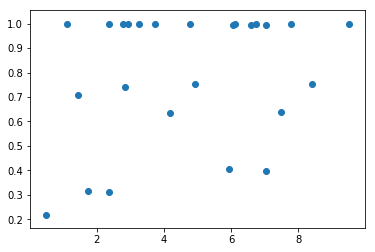

In [80]:
import provided_functions as f 
WN_vec = f.load_vectors("data/word_net.vec")
evaluate_vectors(WN_vec)

### (e)

Run `evaluate_vectors` from part c on the Small World of Words vectors generated in part b. Use `load_vectors` defined in `provided_vectors.py` to load the vectors.

horse mare 8.33

horse colt 7.07

bird hawk 7.85

hound fox 2.38

mink fur 6.83

bee ant 2.78

oil mink 1.23

daughter kid 4.17

chicken steak 3.73

horse ox 3.02

calf bull 4.93

dog horse 2.38

mouse management 0.48

deck mouse 0.48

container mouse 0.3

Pearson r is: 0.30020703341442356 with p value: 0.08451655032349062


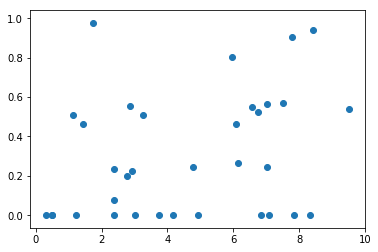

In [77]:
import provided_functions as f
SWOW_vec = f.load_vectors('data/small_world_of_words.vec')
evaluate_vectors(SWOW_vec)

### (f)

Run `evaluate_vectors` from part c on word2vec vectors stored in `data/word2vec.vec`. Use `load_vectors` defined in `provided_functions.py` to load the vectors.

These vectors are a subset of vectors from a 2017 paper by Fares$^4$ with:
 * dimension: 300
 * window: 5
 * corpus: Gigaword 5th Edition
 * vocab size: 261794
 * algorithm: Gensim Continuous Skipgram
 * lemmatization: True

In [1]:
import provided_functions as f
W2_vec = f.load_vectors('data/word2vec.vec')
evaluate_vectors(W2_vec)

NameError: name 'evaluate_vectors' is not defined

### (g)

 * 1. Compare the performance of the three vector spaces referring to both the results of your Pearson correlations and the scatterplots.

 * 2. For each features space, examine some example similarity comparisons and the corresponding word vectors. From your inspection, what do you think is responsible for the different performance of the vector spaces in this task? Show example noun-noun pairs that support your hypothesis about why each of the vector spaces performs well or does not perform well.  Explain how these examples support your hypotheses.

* 1. <br/>
The performance goes as follows:

* For d) data points for these vector spaces from word_net is skewed. Many points within the graph are uniformly at the top. A pearson correlation performance is hindered by these points. At a p-value of 0.19~, we can reject the alternative hypothesis that there is a correlation of r = 0.27~. Therefore, there is no correlation significant at the 90% or 95% confidence level. 
* For e), unlike d), the data points is skewed as many points within the correlation graph are uniformly at the bottom. Generally, the scatter plot appears as though there is a correlation. Given by the values of pearsonr, we can see this is not the case at the 95% confidence level as the p-value = 0.08451655032349062. However, I suspect outliers and zero-datapoints heavily affect the correlation coefficient and p-value. Such datapoints skew the data, and in removing them we may better see a p-value and correlation coefficient more reflective of the data. At the 90% confidence level, however, we may say that there is a positive correlation between simlex-999 and the cosine similarity scores of SWOW vectors at r = 0.3~. Such a correlation is statistically significant at the 90% level.
* For f), unlike d) and e), has many datapoints available, and the data generally consistent with a correlation (e.g. no obvious outliers, no zero-points). Since the p-value is 0.0033110382715266892, at the 95% confidence level, we may conclude that data in word2vec has a significant correlation with simlex-999 data points, and the correlation coefficient is positive at r = 0.4893719058835222~.
<br\>
* 2. 
Likewise from the previous answer, such a disprepancy in the vector space in WordNet has a large affect on the performance in this task. Some vectors, such as for mouse and cat have almost all data point that matches and therefore has a cosine similarity score close to 1. However, it has a simlex-99 score of 1.12. Such vectors affect the graph and skew the regression and ultimately hinders the performance of the model. 
In another case, outliers and zero cos_sim scores heavily influence the performance of the vector spaces. For example, horse and mare have a <0.1 cosine similarity score, lower than most Noun-Noun pairs in this data. Yet, simlex-999 scores it a 8.33. Ultimately, the zero-points of cosine similarity affects the performance. Such datapoints skew the regression of the data and ultimately hinders the performance of the model.
In the W2_vec vector space, the datapoints and their cosine similarity scores are generally consistent with the rest of the data, i.e. no outliers or zero-scores. The data available is ultimately more than the WordNet and SWOW vectors. It regresses into a positive correlation at the p-value of 0.0033110382715266892, less than 0.05 level that allows us to come to the conclusion that such correlation of simlex-999 and cosine similarity scores of W2_vec is statistically significant at the 95% confidence level.

In [81]:
WN_vec = f.load_vectors("data/word_net.vec")
print ("WordNet Nouns example")
print ("Mouse:")
print (WN_vec["mouse"])
print ("Cat:")
print (WN_vec["ant"])
SWOW_vec = f.load_vectors('data/small_world_of_words.vec')
print ("SWOW Nouns example")
print ("Horse:")
print (SWOW_vec["horse"])
print ("Mare:")
print (SWOW_vec["mare"])
W2_vec = f.load_vectors('data/word2vec.vec')
print ("Word2Vec Nouns example")
print ("Dog:")
print (W2_vec["dog"])
print ("Cat:")
print (W2_vec["cat"])

WordNet Nouns example
Mouse:
['0.032359' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.183507'
 '0.132599' '0.132599' '0.102512' '0.096037' '0.062768' '0.052105'
 '0.045664' '0.0' '0.074587' '0.072219' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.011595' '0.001449'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0

### Citations

$^1$Hill, F., Reichart, R., & Korhonen, A. (2015). SimLex-999: Evaluating Semantic Models With (Genuine) Similarity Estimation. Computational Linguistics, 41(4), 665-695. doi:10.1162/coli_a_00237

$^2$Miller, G. A., Beckwith, R., Fellbaum, C., Gross, D., & Miller, K. J. (1990). Introduction to WordNet: An On-line Lexical Database*. International Journal of Lexicography, 3(4), 235-244. doi:10.1093/ijl/3.4.235

$^3$Data is from http://www.smallworldofwords.org.

$^4$ Fares, Murhaf; Kutuzov, Andrei; Oepen, Stephan & Velldal, Erik (2017). Word vectors, reuse, and replicability: Towards a community repository of large-text resources, In Jörg Tiedemann (ed.), Proceedings of the 21st Nordic Conference on Computational Linguistics, NoDaLiDa, 22-24 May 2017. Linköping University Electronic Press. ISBN 978-91-7685-601-7